In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np 
from math import pi

%matplotlib inline

database = 'database.sqlite'
conn = sqlite3.connect(database)

### Let's view all the tables in the database, and their columns

In [2]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
players = pd.read_sql("SELECT * FROM Player;", conn)
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [4]:
player_attr = pd.read_sql("SELECT * FROM Player_Attributes;", conn)
player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
player_attr.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
matches = pd.read_sql("SELECT * FROM Match;", conn)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [7]:
leagues = pd.read_sql("SELECT * FROM League;", conn)
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [8]:
countries = pd.read_sql("SELECT * FROM Country;", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [9]:
teams = pd.read_sql("SELECT * FROM Team;", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [10]:
team_attr = pd.read_sql("""SELECT * FROM Team_Attributes""", conn)

team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [11]:
team_attr.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

### Let's take a look at the total number of goals by league

In [12]:
goals_per_league = pd.read_sql("""SELECT 
                                        League.name AS league_name,
                                        Country.name AS Country,
                                        SUM(home_team_goal+away_team_goal) AS total_goals,
                                        COUNT(Match.match_api_id) AS total_matches,
                                        (CAST (SUM(home_team_goal+away_team_goal) as float)/COUNT(Match.match_api_id)) AS goals_per_game
                                FROM League
                                JOIN Match on League.id = Match.league_id
                                JOIN Country on League.country_id = Country.id 
                                GROUP BY League.name
                                ORDER BY total_goals ASC;
                                """, conn)
goals_per_league

,league_name,Country,total_goals,total_matches,goals_per_game
0,Switzerland Super League,Switzerland,4166,1422,2.929677
1,Poland Ekstraklasa,Poland,4656,1920,2.425000
2,Scotland Premier League,Scotland,4804,1824,2.633772
3,Belgium Jupiler League,Belgium,4841,1728,2.801505
4,Portugal Liga ZON Sagres,Portugal,5201,2052,2.534600
5,Germany 1. Bundesliga,Germany,7103,2448,2.901552
6,France Ligue 1,France,7427,3040,2.443092
7,Netherlands Eredivisie,Netherlands,7542,2448,3.080882
8,Italy Serie A,Italy,7895,3017,2.616838
9,England Premier League,England,8240,3040,2.710526


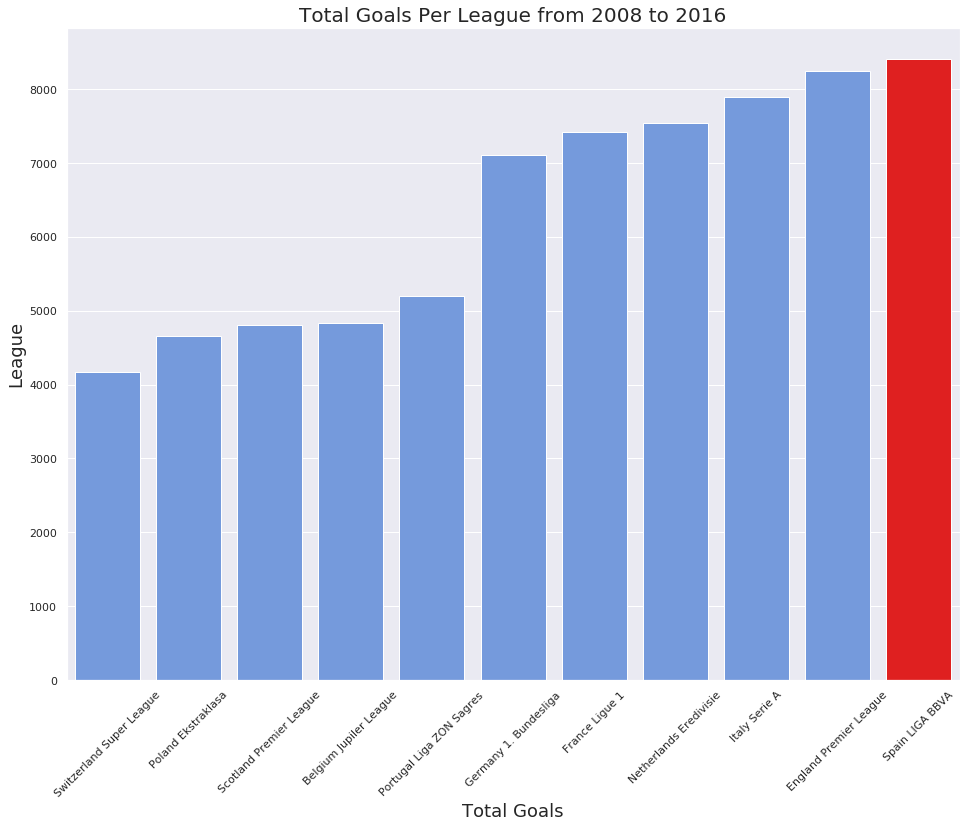

In [13]:
fig1 = plt.figure(figsize = (16, 12))

sns.set(style="darkgrid")
values = list(goals_per_league['total_goals'])
max_goals = max(values)
clrs = ['cornflowerblue' if x < max_goals else 'red' for x in values]

ax = sns.barplot(x='league_name', y='total_goals', data=goals_per_league, palette=clrs) 
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.xlabel("Total Goals", fontsize = 18)
plt.ylabel("League", fontsize = 18)
plt.title("Total Goals Per League from 2008 to 2016", fontsize=20)

plt.show()

### Goals by region

In [14]:
country_geo = 'euro-countries.json'

m = folium.Map(location=[49, 10], zoom_start=4)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=goals_per_league,
    columns=['Country', 'total_goals'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Goals'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Let's look at goals per game, by league

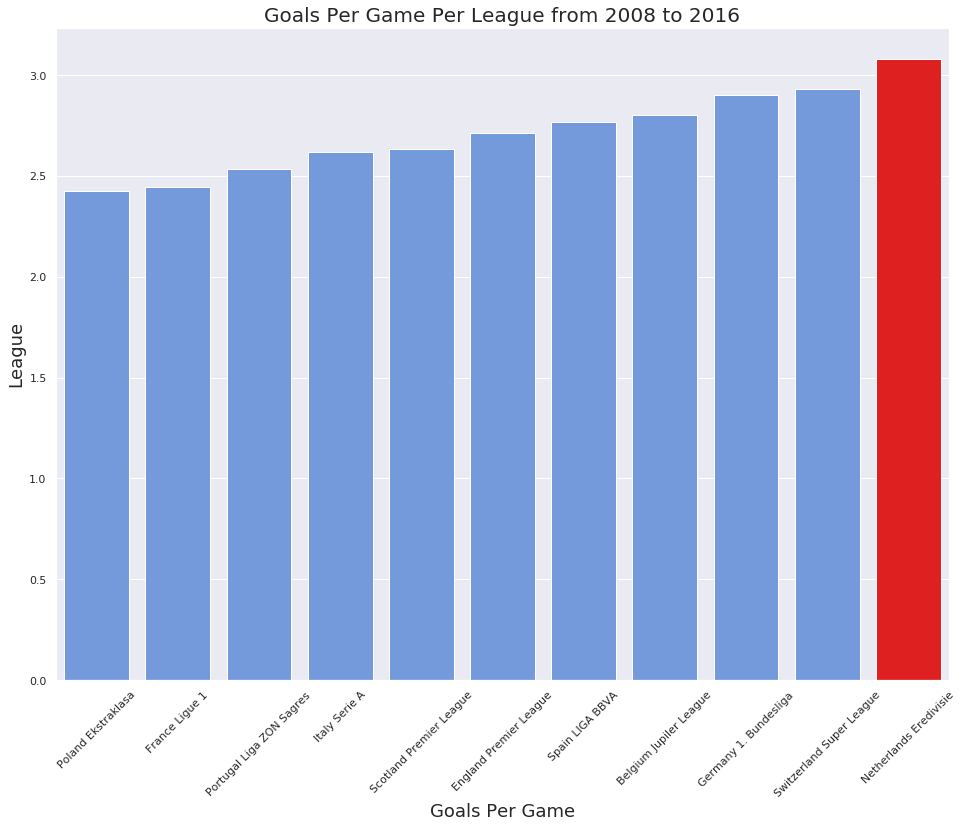

In [15]:
fig2 = plt.figure(figsize = (16, 12))

sns.set(style="darkgrid")


gpg = goals_per_league.sort_values('goals_per_game')
values = list(gpg['goals_per_game'])
max_gpg = max(values)
clrs = ['cornflowerblue' if x < max_gpg else 'red' for x in values]

ax = sns.barplot(x='league_name', y='goals_per_game', data=gpg, palette=clrs) 
plt.xlabel("Goals Per Game", fontsize=18)
plt.ylabel("League", fontsize=18)
plt.title("Goals Per Game Per League from 2008 to 2016", fontsize=20)

for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

### Goals per game by region

In [16]:
m = folium.Map(location=[49, 10], zoom_start=4)

folium.Choropleth(
    geo_data=country_geo,
    name='choropleth',
    data=goals_per_league,
    columns=['Country', 'goals_per_game'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Goals Per Game'
).add_to(m)

folium.LayerControl().add_to(m)

m

Visualization stuff - creating our colormap for heatmaps

In [17]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

### What makes a player successful?

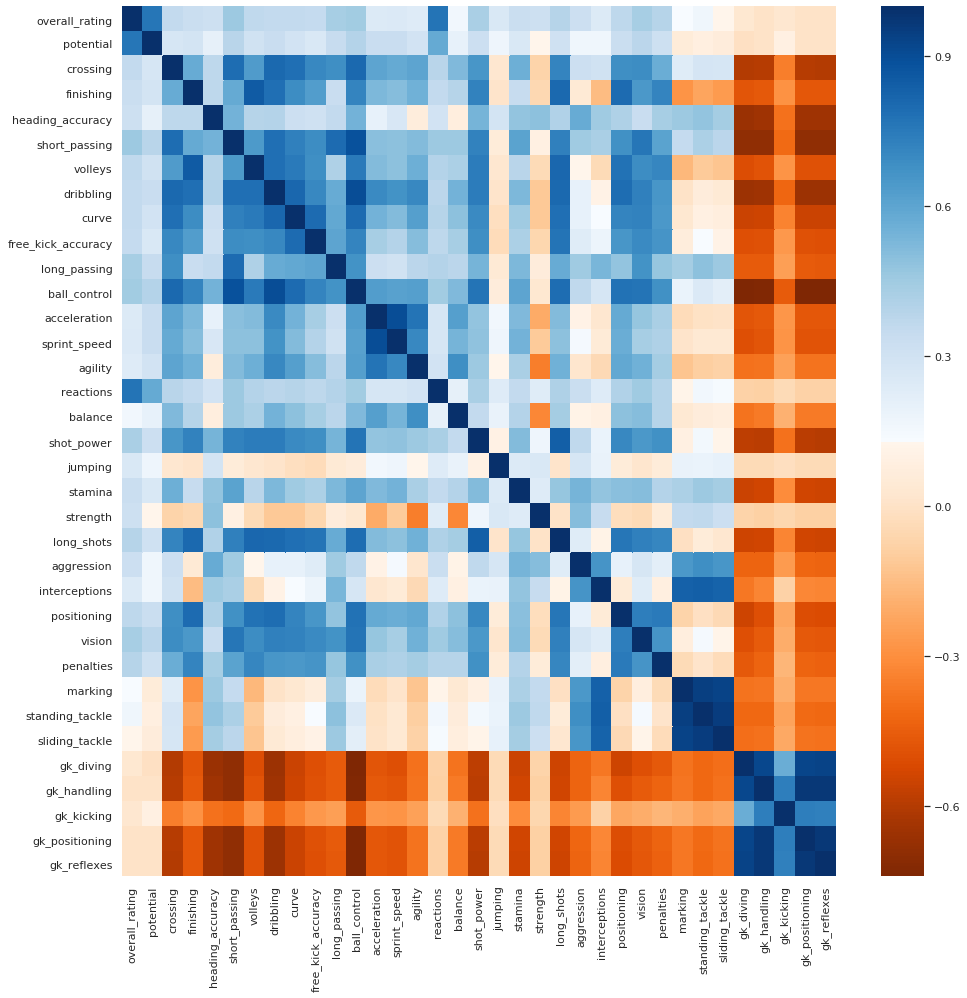

In [18]:
fig3 = plt.figure(figsize = (16, 16))

cols = ['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 
        'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning','gk_reflexes']

query = f""" SELECT {", ".join(cols)}
             FROM Player_Attributes; 
        """

player_attr_condensed = pd.read_sql(query, conn)


corr = player_attr_condensed.corr()


sns.heatmap(corr, cmap=newcmp)

There's a clear correlation between reactions, player rating, and potential.

In [19]:
players.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [20]:
player_attr.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

### Get the highest rated players 

In [21]:
query = """ SELECT DISTINCT p.player_api_id, p.player_name, a.overall_rating, a.reactions, a.potential
            FROM Player as p, Player_Attributes as a
            WHERE p.player_api_id = a.player_api_id
            ORDER BY a.overall_rating DESC;
"""
players_and_attr = pd.read_sql(query, conn)

players_and_attr = players_and_attr.drop_duplicates(subset='player_name', keep='first')

[]

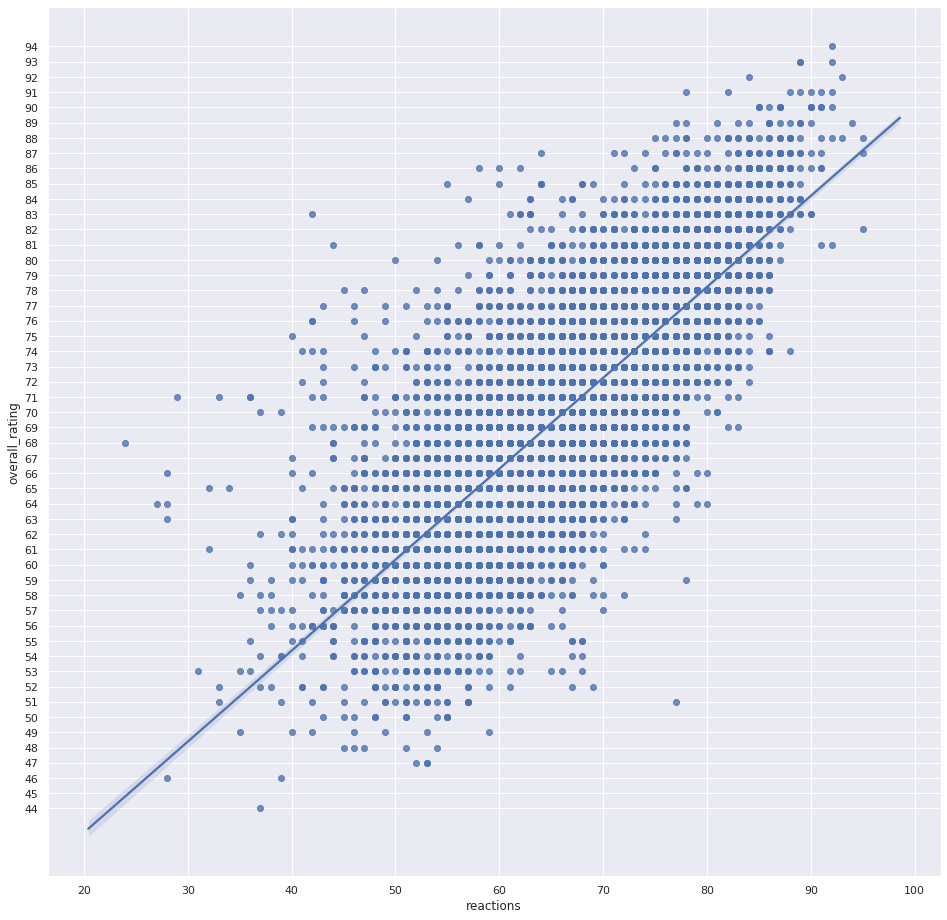

In [22]:
max_val = players_and_attr['overall_rating'].max()
min_val = players_and_attr['overall_rating'].min()
fig5 = plt.figure(figsize = (16, 16))
ax = sns.regplot(x="reactions", y="overall_rating", data=players_and_attr)
plt.yticks([i for i in range((int)(min_val), (int)(max_val+1))])
plt.plot()

In [23]:
players_and_attr = players_and_attr.head(20)
players_and_attr

,player_api_id,player_name,overall_rating,reactions,potential
0,30981,Lionel Messi,94.0,92.0,94.0
4,30893,Cristiano Ronaldo,93.0,92.0,93.0
5,30717,Gianluigi Buffon,93.0,89.0,93.0
8,30829,Wayne Rooney,93.0,89.0,93.0
12,39989,Gregory Coupet,92.0,84.0,93.0
13,39854,Xavi Hernandez,92.0,93.0,92.0
14,30723,Alessandro Nesta,91.0,78.0,92.0
15,30955,Andres Iniesta,91.0,90.0,93.0
19,34520,Fabio Cannavaro,91.0,89.0,92.0
21,30657,Iker Casillas,91.0,88.0,92.0


In [24]:
max_val = players_and_attr['overall_rating'].max()
min_val = players_and_attr['overall_rating'].min()



([<matplotlib.axis.YTick at 0x7f90adcf7a90>,
 <a list of 5 Text yticklabel objects>)

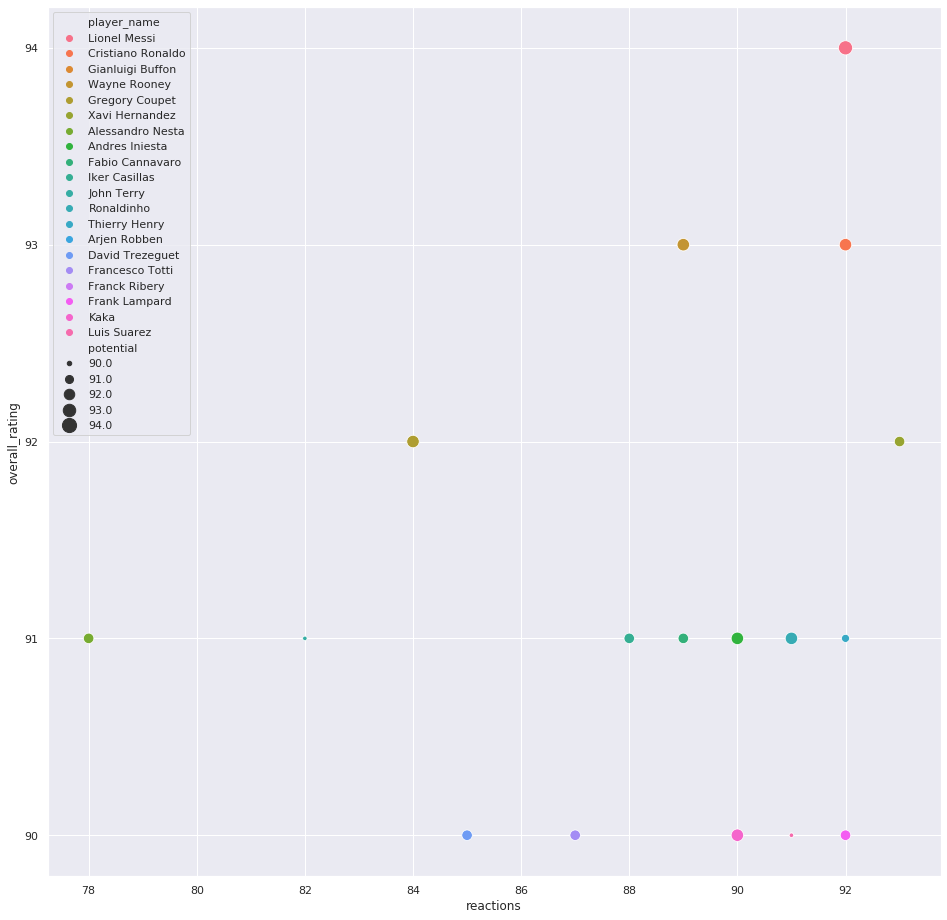

In [25]:
fig5 = plt.figure(figsize = (16, 16))
ax = sns.scatterplot(x="reactions", y="overall_rating", hue="player_name", size="potential", data=players_and_attr, legend="full", sizes=(20, 200))
plt.yticks([i for i in range((int)(min_val), (int)(max_val+1))])

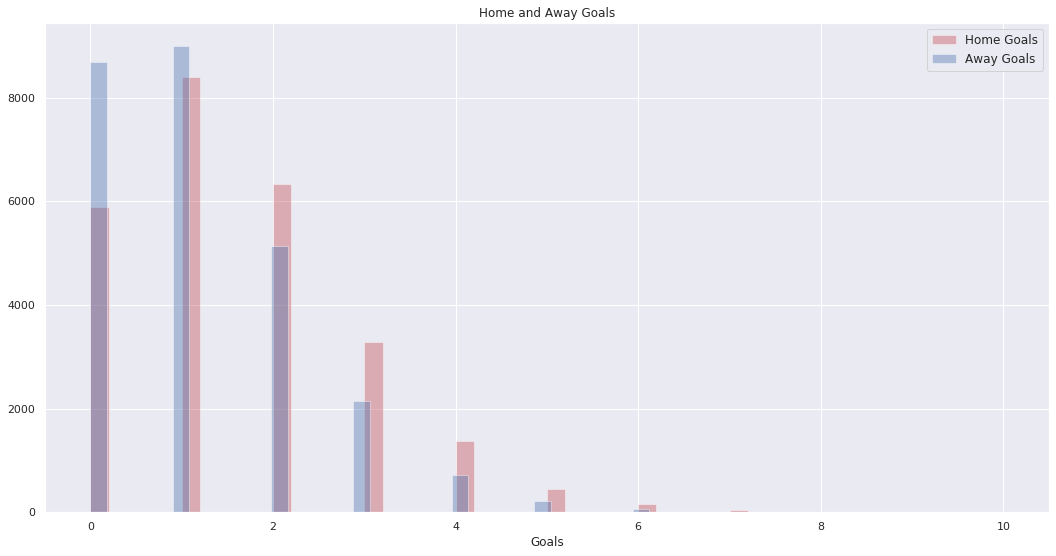

In [27]:
plt.figure(figsize=(18,9))
sns.distplot(matches["home_team_goal"],
            color="r",label="Home Goals",kde=None,norm_hist=False)
sns.distplot(matches["away_team_goal"],
            color="b",label="Away Goals", kde=None, norm_hist=False)

plt.legend(loc="best",prop = {"size" : 12})
plt.title("Home and Away Goals")
plt.xlabel("Goals")
plt.show()

In [46]:
query = """ SELECT Player.player_api_id, player_name, preferred_foot, date, attacking_work_rate, defensive_work_rate
            FROM Player JOIN Player_Attributes ON (Player.player_api_id = Player_Attributes.player_api_id)
            WHERE attacking_work_rate == "low"
            GROUP BY Player.player_api_id, player_name, preferred_foot
        """
players_all = pd.read_sql(query, conn)

In [50]:
players_all.head()

,player_api_id,player_name,preferred_foot,date,attacking_work_rate,defensive_work_rate
0,2977,David Rivas Rodriguez,right,2012-08-31 00:00:00,low,medium
1,3520,Andrey Arshavin,right,2007-02-22 00:00:00,low,low
2,5202,Remy Gomis,right,2016-05-05 00:00:00,low,high
3,6864,Santiago Acasiete,right,2007-02-22 00:00:00,low,medium
4,7284,Kasper Haemaelaeinen,right,2014-04-04 00:00:00,low,medium


In [84]:
query = """ SELECT preferred_foot, COUNT(*) as num
            FROM 
                (
                SELECT Player.player_api_id, player_name, preferred_foot, date, attacking_work_rate, defensive_work_rate
                FROM Player JOIN Player_Attributes ON (Player.player_api_id = Player_Attributes.player_api_id)
                WHERE attacking_work_rate == "low"
                GROUP BY Player.player_api_id, player_name, preferred_foot
                )
            GROUP BY preferred_foot
        """
preferred_foot_df = pd.read_sql(query, conn)

preferred_foot_df

,preferred_foot,num
0,left,189
1,right,726


Text(0.5, 1.0, 'Preferred foot by attacking players')

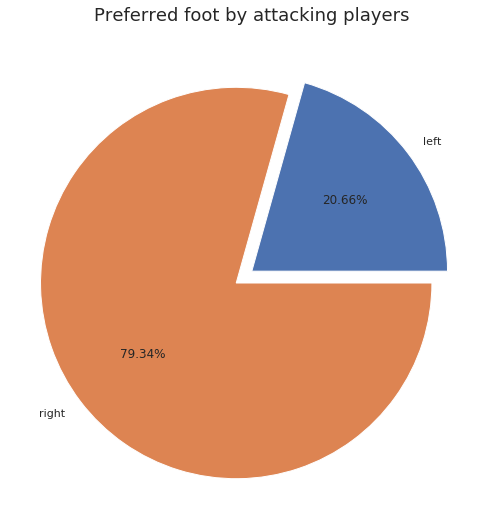

In [85]:
plt.figure(figsize=(18,9))
explode = [0, 0.1]
labels = list(preferred_foot_df['preferred_foot'])
preferred_foot_df['num'].plot.pie(explode=explode, labels=labels, autopct = "%.2f%%")
plt.ylabel("")
plt.title("Preferred foot by attacking players", fontsize=18)

In [86]:
query = """ SELECT preferred_foot, COUNT(*) as num
            FROM 
                (
                SELECT Player.player_api_id, player_name, preferred_foot, date, attacking_work_rate, defensive_work_rate
                FROM Player JOIN Player_Attributes ON (Player.player_api_id = Player_Attributes.player_api_id)
                WHERE defensive_work_rate == "low"
                GROUP BY Player.player_api_id, player_name, preferred_foot
                )
            GROUP BY preferred_foot
        """
preferred_foot_df = pd.read_sql(query, conn)

preferred_foot_df

,preferred_foot,num
0,left,460
1,right,1264


Text(0.5, 1.0, 'Preferred foot by defensive players')

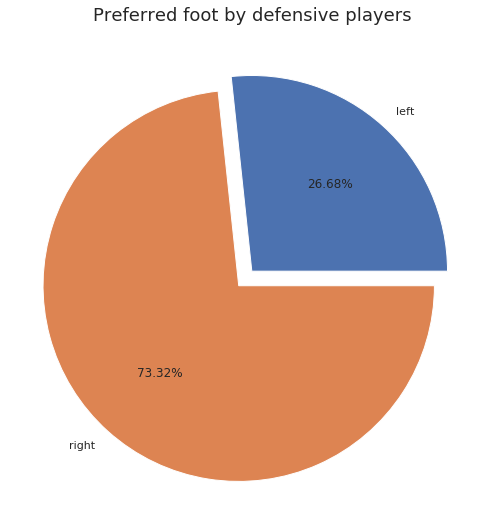

In [87]:
plt.figure(figsize=(18,9))
explode = [0, 0.1]
labels = list(preferred_foot_df['preferred_foot'])
preferred_foot_df['num'].plot.pie(explode=explode, labels=labels, autopct = "%.2f%%")
plt.ylabel("")
plt.title("Preferred foot by defensive players", fontsize=18)

In [89]:
query = """ SELECT DISTINCT *
            FROM Player as p, Player_Attributes as a
            WHERE p.player_api_id = a.player_api_id
            ORDER BY a.overall_rating DESC;
        """
players_and_attr = pd.read_sql(query, conn)

players_and_attr = players_and_attr.drop_duplicates(subset='player_name', keep='first').head(6)
players_and_attr

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,6176,30981,Lionel Messi,158023,1987-06-24 00:00:00,170.18,159,102483,158023,30981,...,90.0,74.0,13.0,23.0,21.0,6.0,11.0,15.0,14.0,8.0
12,1995,30893,Cristiano Ronaldo,20801,1985-02-05 00:00:00,185.42,176,33331,20801,30893,...,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
15,3826,30717,Gianluigi Buffon,1179,1978-01-28 00:00:00,193.04,201,63876,1179,30717,...,70.0,88.0,8.0,8.0,9.0,91.0,93.0,76.0,96.0,93.0
22,10749,30829,Wayne Rooney,54050,1985-10-24 00:00:00,175.26,183,178976,54050,30829,...,88.0,80.0,28.0,42.0,41.0,11.0,7.0,71.0,11.0,12.0
37,3994,39989,Gregory Coupet,1747,1972-12-31 00:00:00,180.34,176,66758,1747,39989,...,51.0,80.0,8.0,13.0,12.0,93.0,91.0,82.0,93.0,88.0
38,10861,39854,Xavi Hernandez,10535,1980-01-25 00:00:00,170.18,148,180724,10535,39854,...,97.0,75.0,55.0,62.0,61.0,5.0,15.0,12.0,5.0,9.0


In [91]:
columns = ['overall_rating','potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'standing_tackle', 'sliding_tackle']


In [97]:
names = list(players_and_attr['player_name'])
names

['Lionel Messi',
 'Cristiano Ronaldo',
 'Gianluigi Buffon',
 'Wayne Rooney',
 'Gregory Coupet',
 'Xavi Hernandez']

In [141]:
def make_spider(row, title, color, player):
    categories = columns
       
    N = len(categories)

    values= player.values.tolist()
    values += values[:1]

    maximum = 100
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(2, 3,row, polar=True)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=10)
    # Draw ylabels
    ax.set_rlabel_position(0)
    sep = maximum/4
    plt.yticks([sep, sep*2, sep*3], color='black', size=12)
    plt.ylim(0,100)
    # Plot data
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')

    # Fill area
    ax.fill(angles, values, color=color, alpha=0.4)    
    plt.title(title, size=20, color='black', y=1.1)

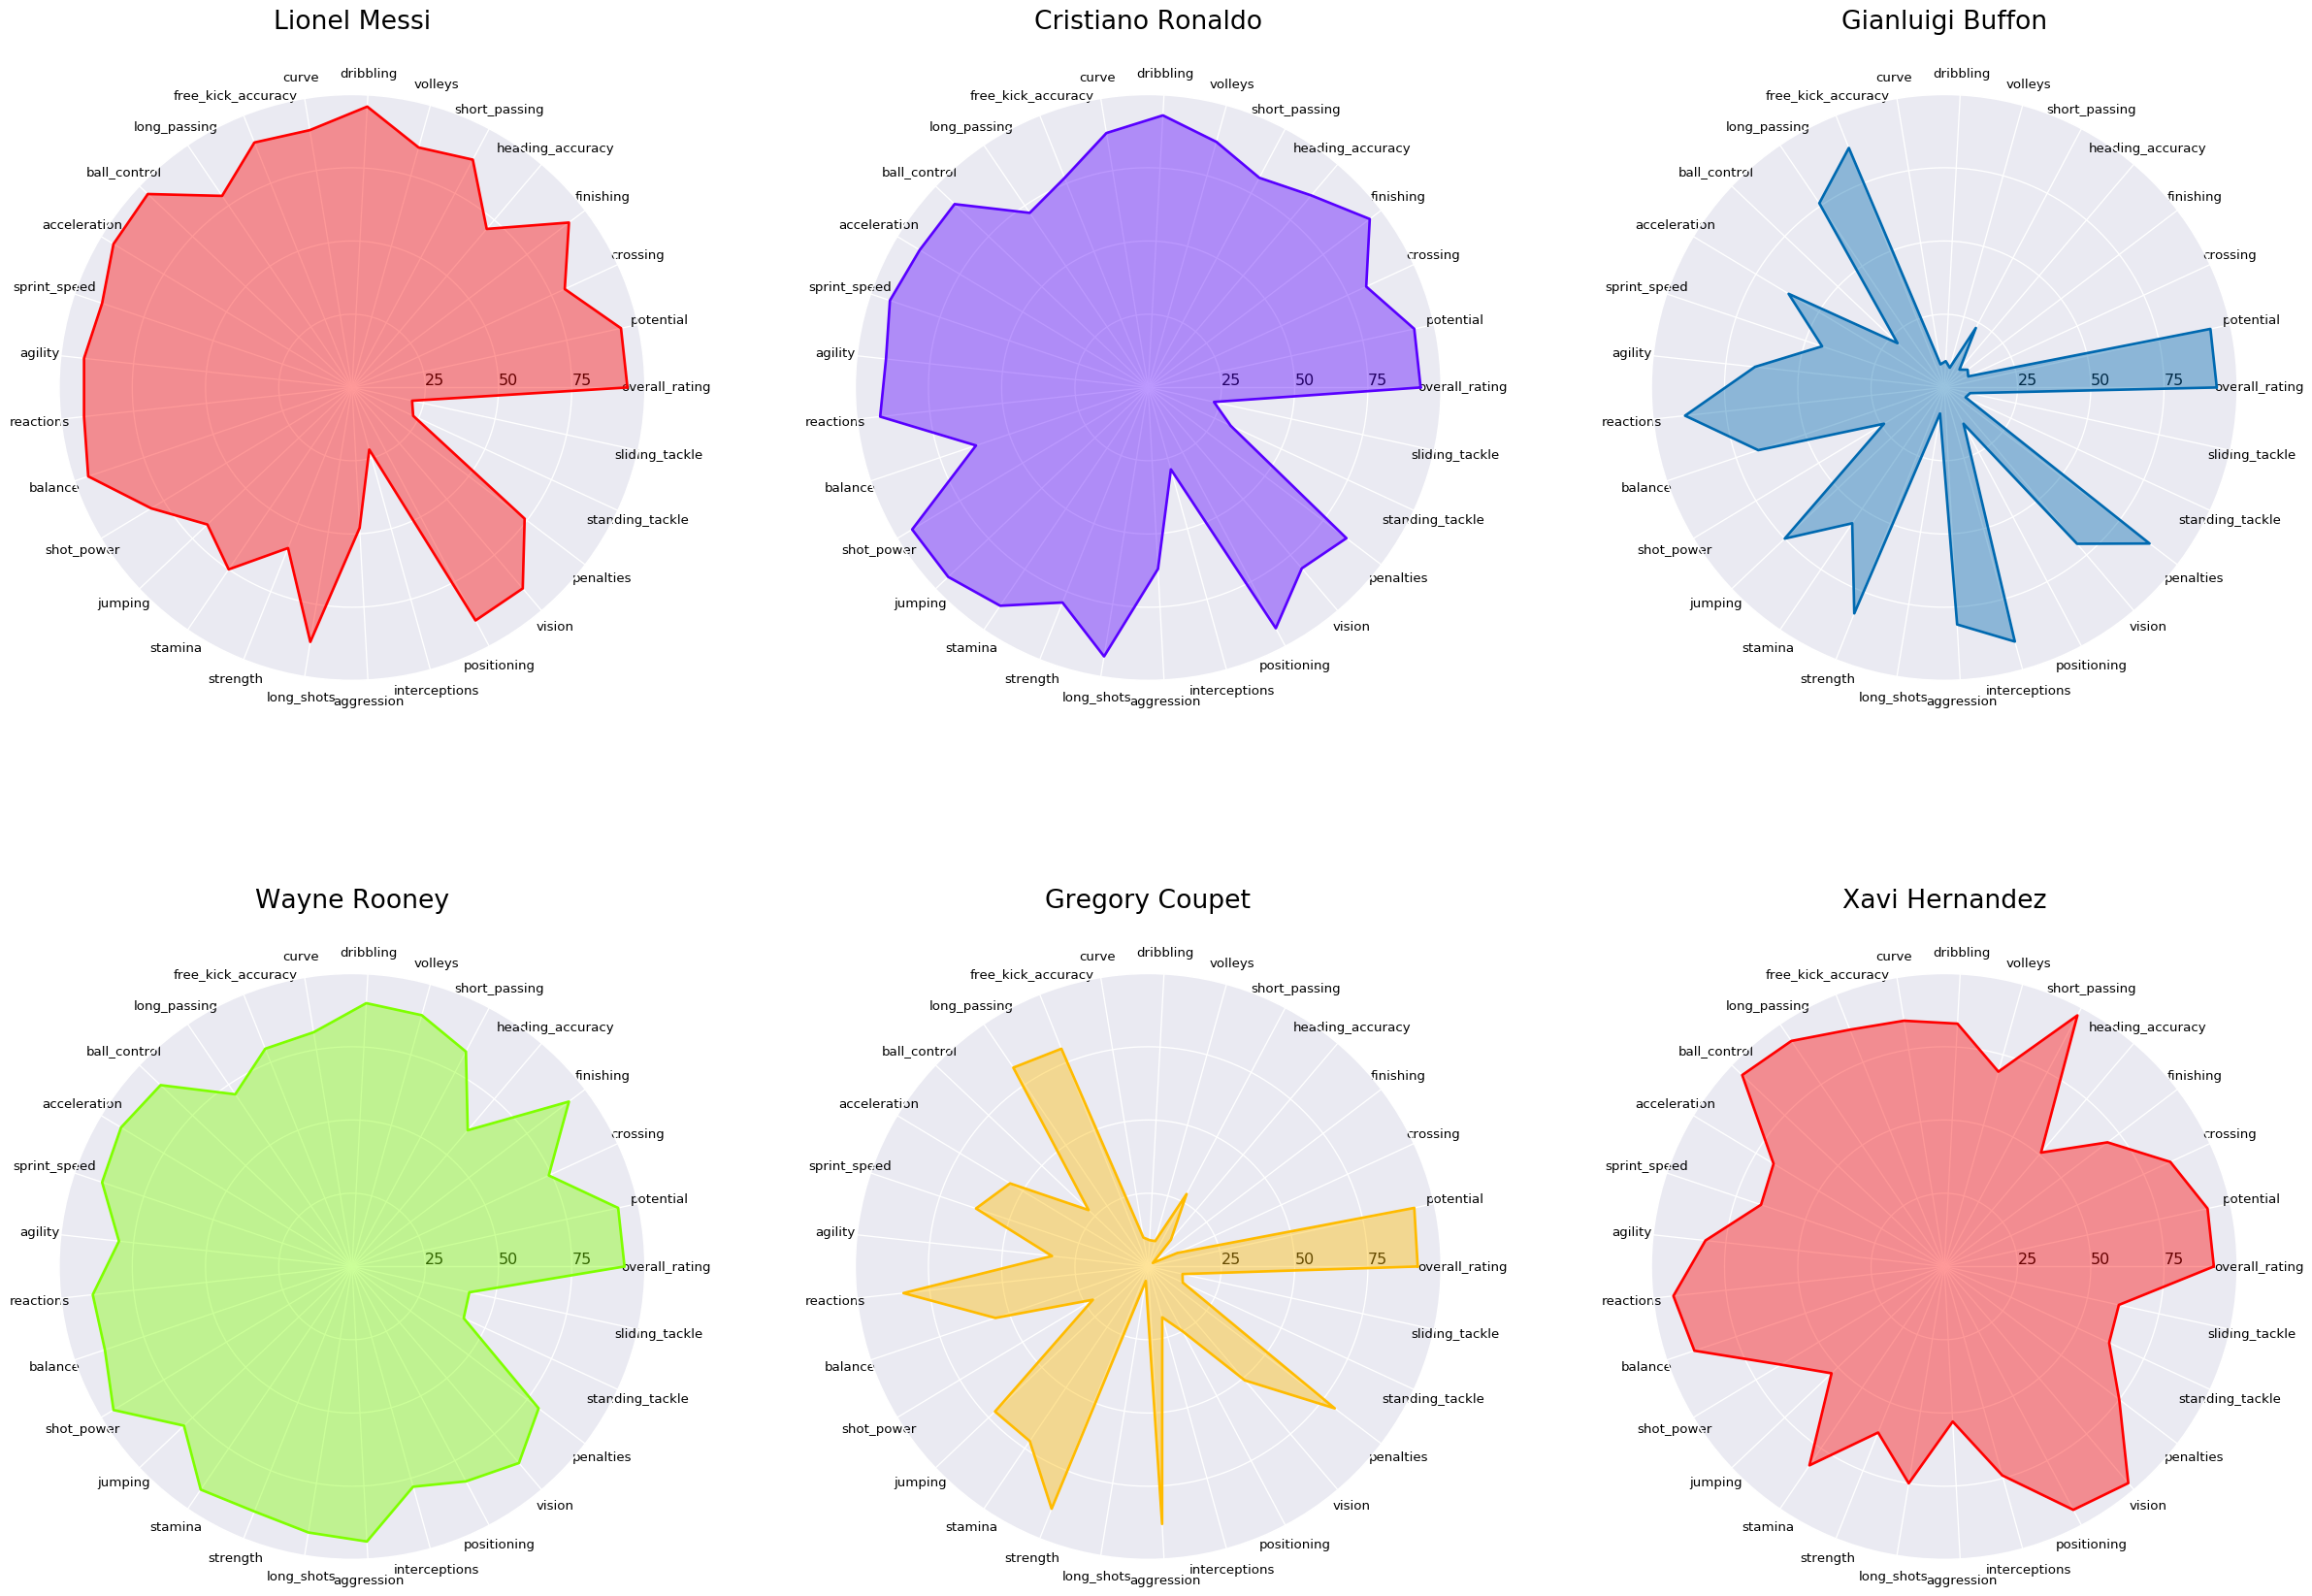

In [142]:
my_dpi=96
plt.figure(figsize=(3000/my_dpi, 2000/my_dpi), dpi=my_dpi)

my_palette = plt.cm.get_cmap("prism", 14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

for i in range(len(names)):
    test_df = players_and_attr.iloc[i][columns]
    title=names[i]
    
    color=my_palette(i)
    make_spider(i+1, title, color, test_df)
    